Voici le graphique des bandes de valences et de conduction :


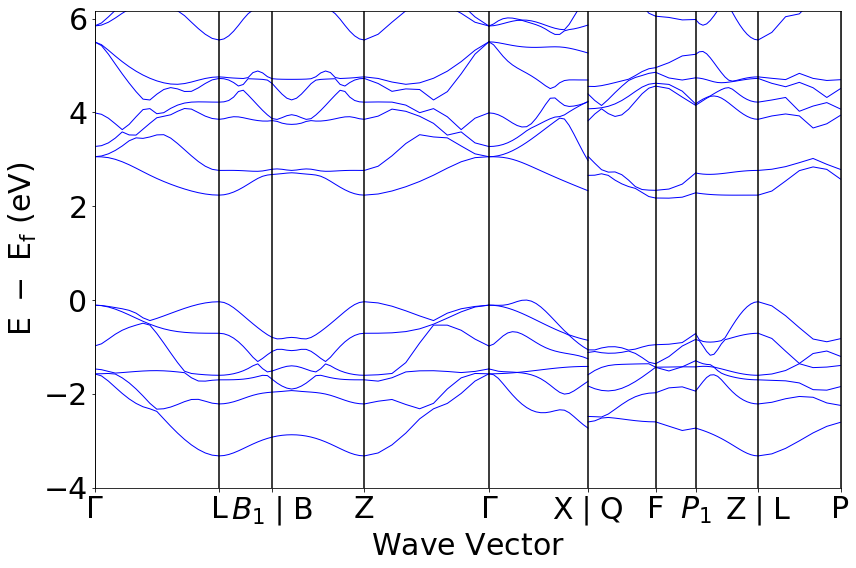



La bande interdite a une énergie de : 2.1725999999999996
Elle est indirecte
Son vecteur d'onde de transition est : (0.130,0.000,-0.130)-(0.553,0.553,0.061)


Analyse des maximums et minimum de dispersion des bandes de valence et de conduction
Le maximum de dispersion de la dernière bande de valence est de 2.044519734230429 et se trouve entre L et B1|B
Le minimum de dispersion de la dernière bande de valence est de 0.08363236151960152 et se trouve entre Z et Gamma
Le maximum de dispersion de la première bande de conduction est de 1.1835419918244245 et se trouve entre L et B1|B
Le minimum de dispersion de la première bande de conduction est de 0.11287240432012352 et se trouve entre P1 et Z|L

Voici le graphique avec les flèche :


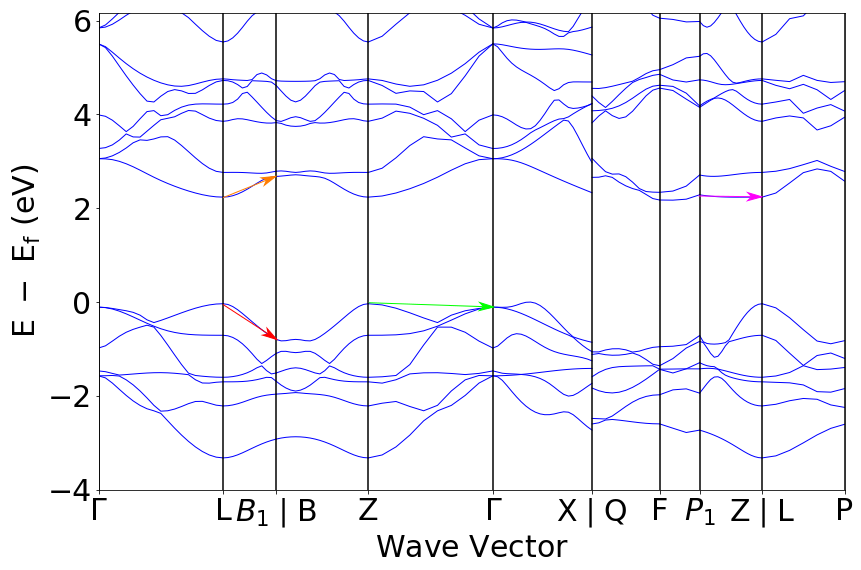

In [46]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.bandstructure import *
from pymatgen.electronic_structure import plotter
import matplotlib.pyplot as plt
from IPython.display import Image

with MPRester ("xc5hpBnRqKJUV1Ow") as m:
    bandStructure = m.get_bandstructure_by_material_id("mp-569507")

# Graphique des bandes de valences/conduction
graphique = plotter.BSPlotter(bandStructure)
print("Voici le graphique des bandes de valences et de conduction :")
graphique.show()
print("")
print("")


# Analyse de la bande interdite
bandGap = bandStructure.get_band_gap()
print("La bande interdite a une énergie de :", bandGap["energy"])
if(bandGap["direct"]):
    print("Elle est directe")
else:
    print("Elle est indirecte")
print("Son vecteur d'onde de transition est :", bandGap["transition"])
print("")
print("")


# Analyse des direction desd bandes
print("Analyse des maximums et minimum de dispersion des bandes de valence et de conduction")
data = graphique.bs_plot_data()  # Creation d'un dictionaire contenant toutes les informations necessaires
distances = data.get("ticks").get("distance")  # On recupere les distance des branches

# Calcul des differentes distances entre les branches :
D1 = distances[1] - distances[0]
D2 = distances[3] - distances[2]
D3 = distances[4] - distances[3]
D4 = distances[6] - distances[5]
D5 = distances[8] - distances[7]
D6 = distances[9] - distances[8]
D7 = distances[11] - distances[10]
D8 = distances[13] - distances[12]
D9 = distances[14] - distances[13]
dist = [D1, D2, D3, D4, D5, D6, D7, D8, D9]

# Calcul du maximum et du minimum de dispersion pour la derniere bande de valence grace a une boucle :
i = 0
maxVal = 0
iMax = 0
minVal = 100000000000
iMin = 0
while(i < 9):
    deltaEnergy = data.get("energy")[i]["1"][16][-1] - data.get("energy")[i]["1"][16][0]
    pente = abs(deltaEnergy/dist[i])
    if pente > maxVal:
        maxVal = pente
        iMax = i
    if pente < minVal:
        minVal = pente
        iMin = i
    i = i + 1
# On trouve l'endroit des max/min grace à la valeur de iMax et iMin qui donnent la colone ou ils se trouvent
print("Le maximum de dispersion de la dernière bande de valence est de", maxVal, "et se trouve entre L et B1|B")
print("Le minimum de dispersion de la dernière bande de valence est de", minVal, "et se trouve entre Z et Gamma")

# Calcul du maximum et du minimum de dispersion pour la premiere bande de conduction grace a une boucle :
i = 0
maxCond = 0
iMax = 0
minCond = 100000000000
iMin = 0
while(i < 9):
    deltaEnergy = data.get("energy")[i]["1"][17][-1] - data.get("energy")[i]["1"][17][0]
    pente = abs(deltaEnergy/dist[i])
    if pente > maxCond:
        maxCond = pente
        iMax = i
    if pente < minCond:
        minCond = pente
        iMin = i
    i = i + 1
# On trouve l'endroit des max/min grace à la valeur de iMax et iMin qui donnent la colone ou ils se trouvent
print("Le maximum de dispersion de la première bande de conduction est de", maxCond, "et se trouve entre L et B1|B")
print("Le minimum de dispersion de la première bande de conduction est de", minCond, "et se trouve entre P1 et Z|L")
print("")
print("Voici le graphique avec les flèche :")
Image(filename='Wave.PNG')
